In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_excel("CAN_short_20220504_cleaned.xlsx")
df.columns

Index(['Time', 'ReferenceTime', 'DataTank.TemperaturTank',
       'DieselData.DieselRPM', 'DieselData.Fuelconsumption',
       'DieselData.NAFGear', 'DieselData.OperatHours', 'DieselData.Speed',
       'MaschineStatus.AllradAus', 'MaschineStatus.AmbientPressure',
       'MaschineStatus.AmbientTemp', 'MaschineStatus.CraneFktOn',
       'MaschineStatus.DieselFuellstand', 'MaschineStatus.DieselWaterTemp',
       'MaschineStatus.DiffLockOn', 'MaschineStatus.DriveDirecFow',
       'MaschineStatus.DriveDirecRev', 'MaschineStatus.ECOModeOn',
       'MaschineStatus.HighTempHydroOil', 'MaschineStatus.HighTempWater',
       'MaschineStatus.HydroOilLevelLow', 'MaschineStatus.WorkHydraulikAktiv',
       'Pumpe_Ibc_Obc_Druck.IbcP', 'Pumpe_Ibc_Obc_Druck.ObcP',
       'Pumpe_Ibc_Obc_Druck.PumpeLS', 'Pumpe_Ibc_Obc_Druck.PumpeP',
       'TankP.LeckoelP', 'TankP.LenkungA', 'TankP.LenkungB', 'TankP.TankP'],
      dtype='object')

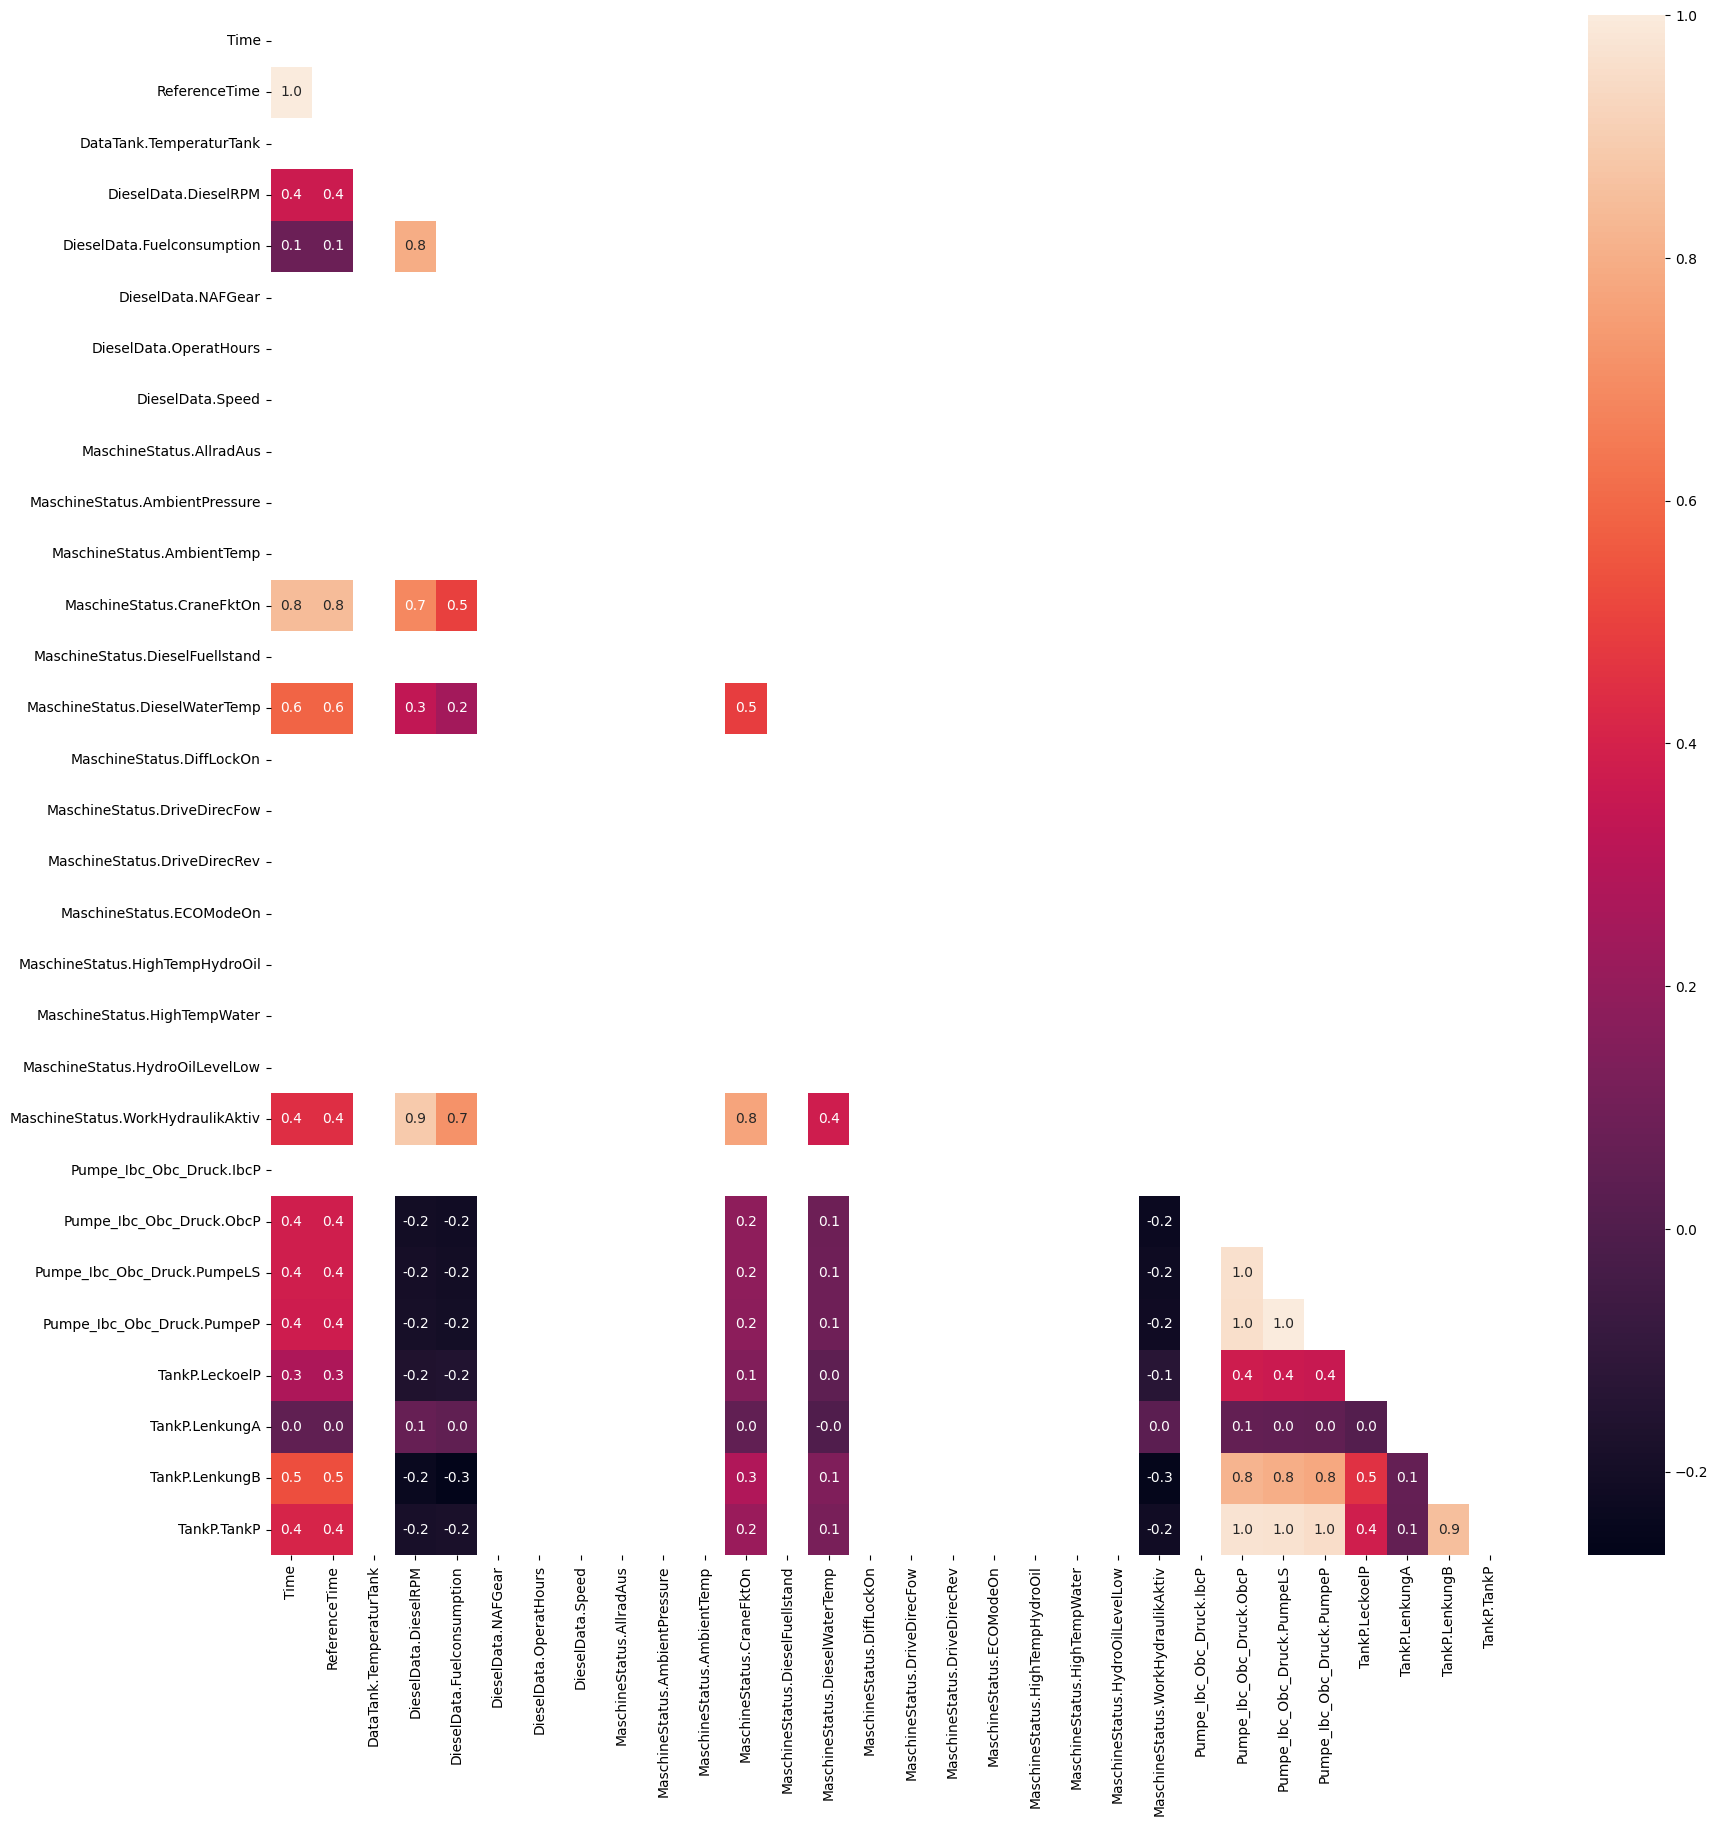

In [3]:
plt.figure(figsize=(20, 20))

df = pd.read_excel("CAN_short_20220504_cleaned.xlsx")

corr_matrix = df.corr() #  Pearson's correlation coefficient

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, mask=mask, fmt=".1f")

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

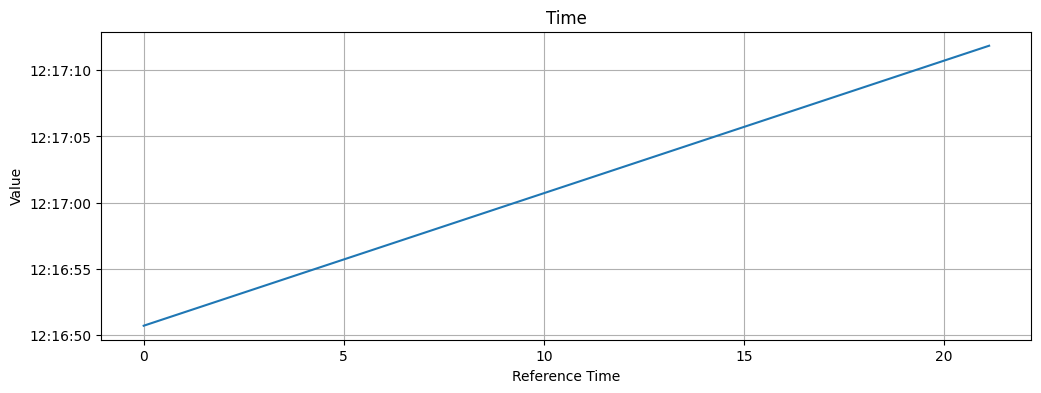

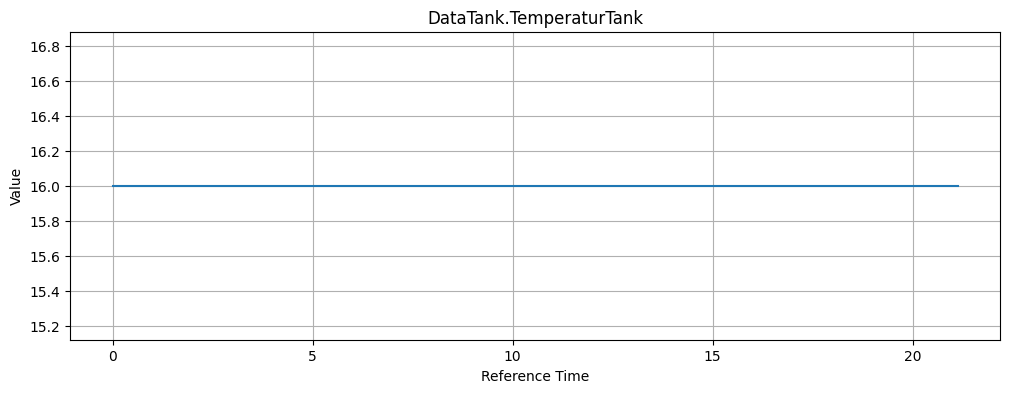

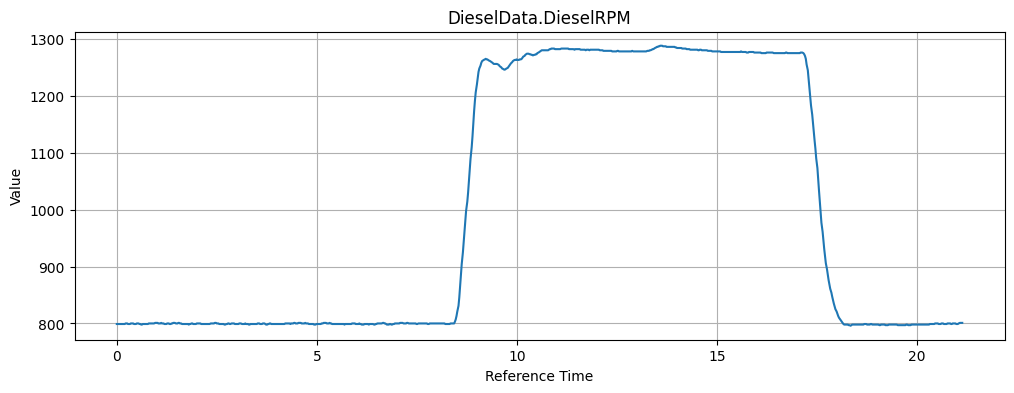

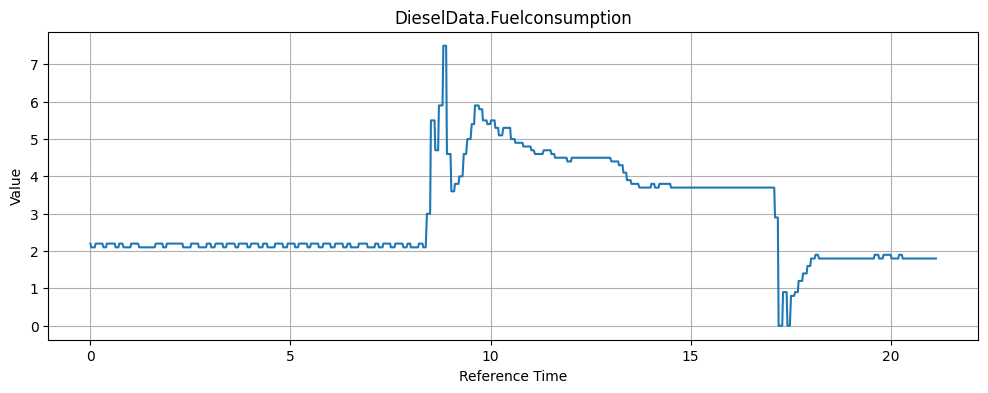

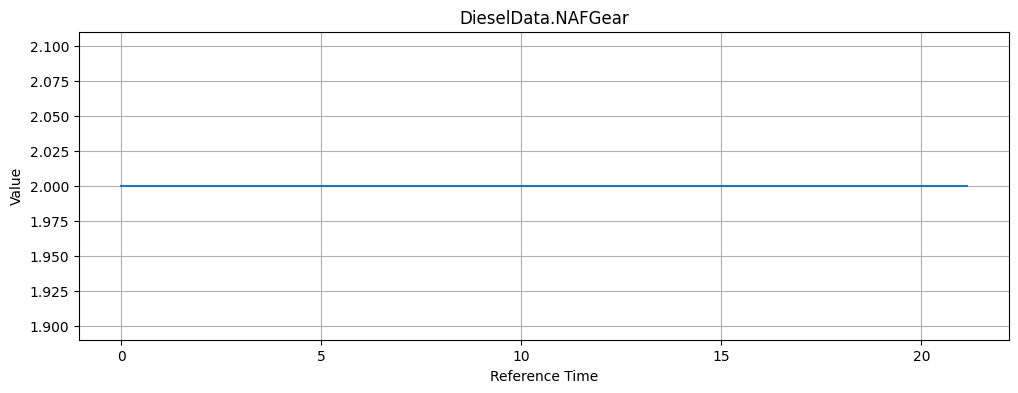

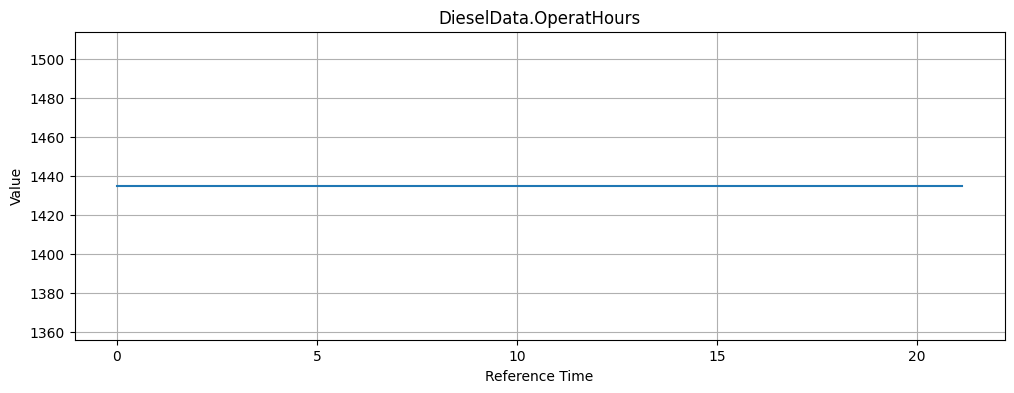

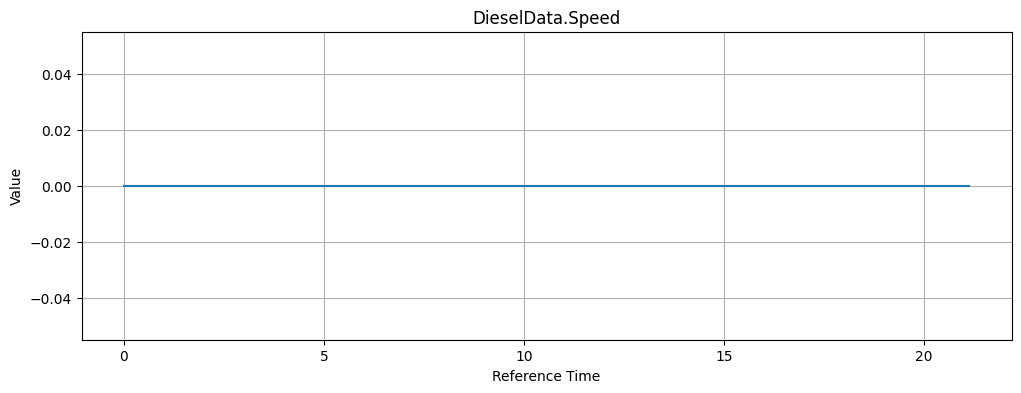

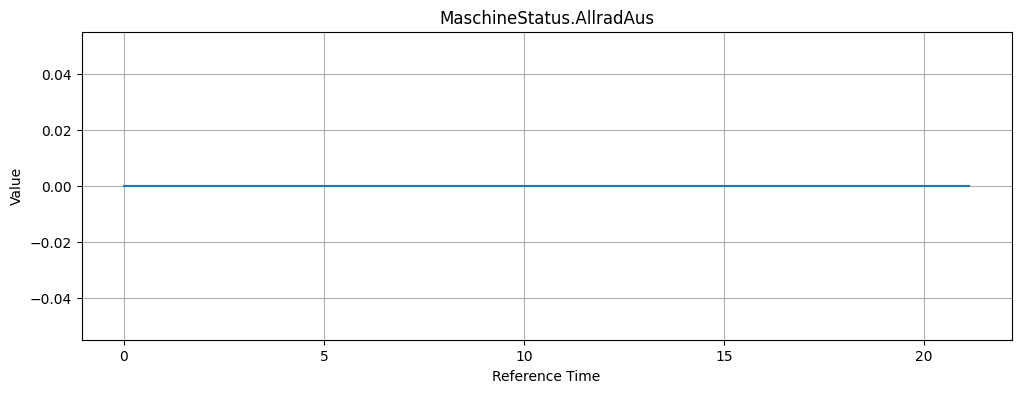

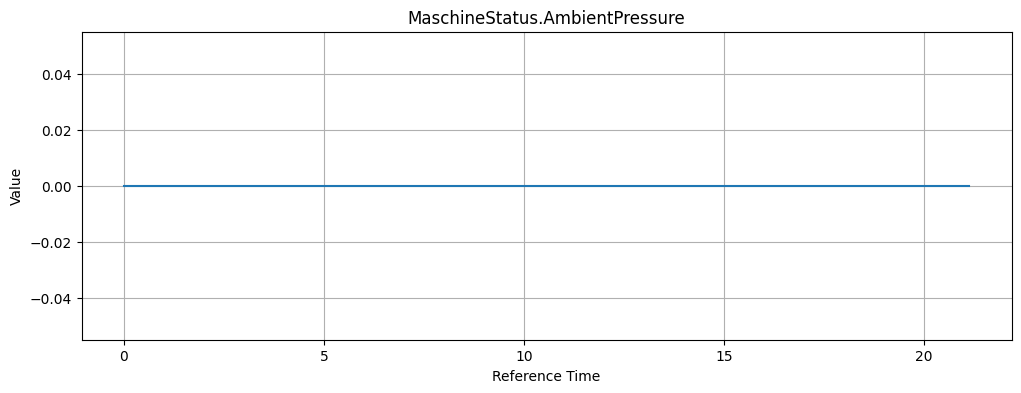

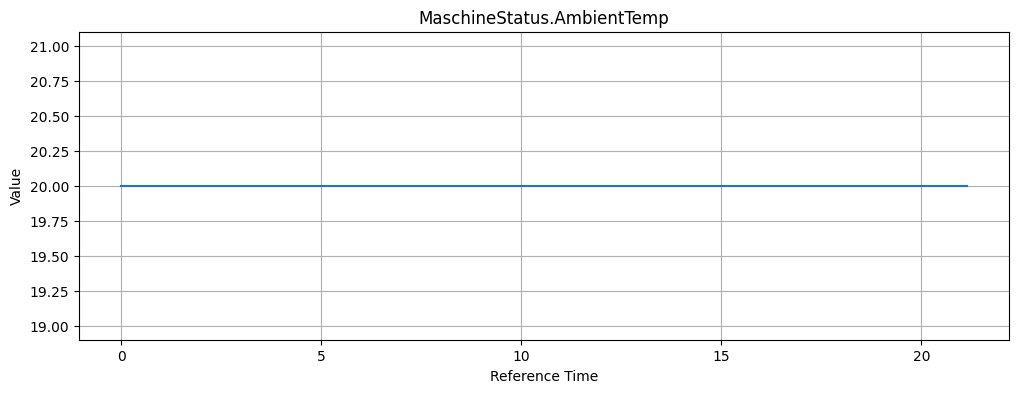

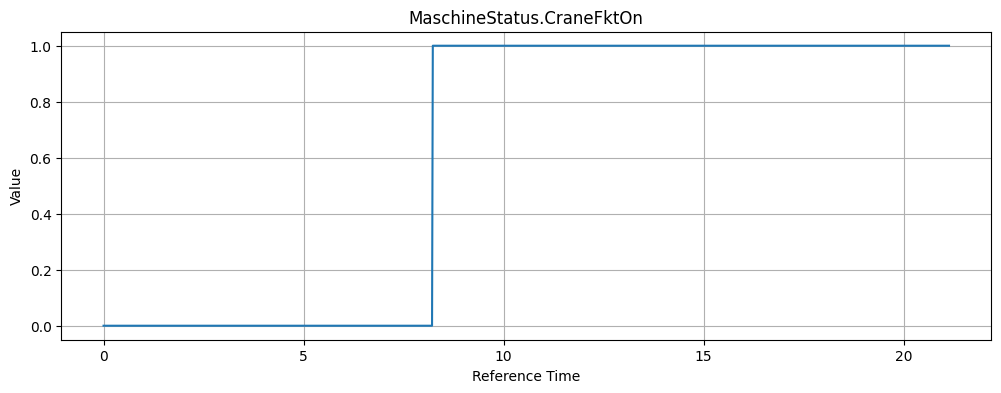

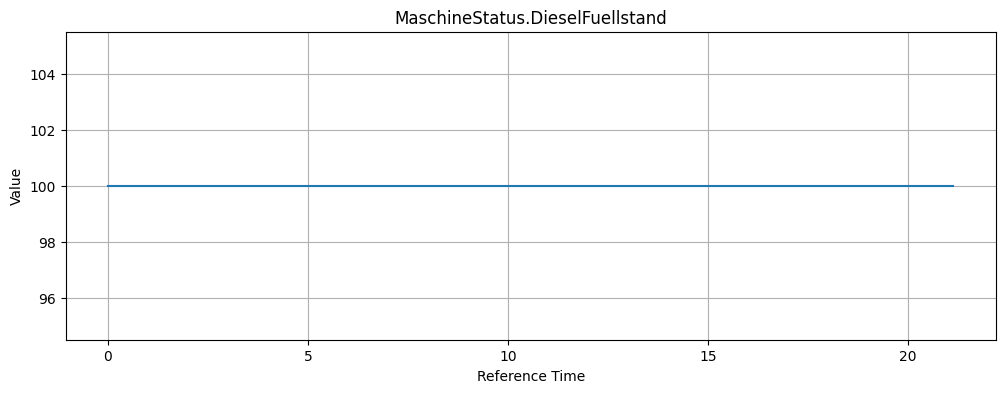

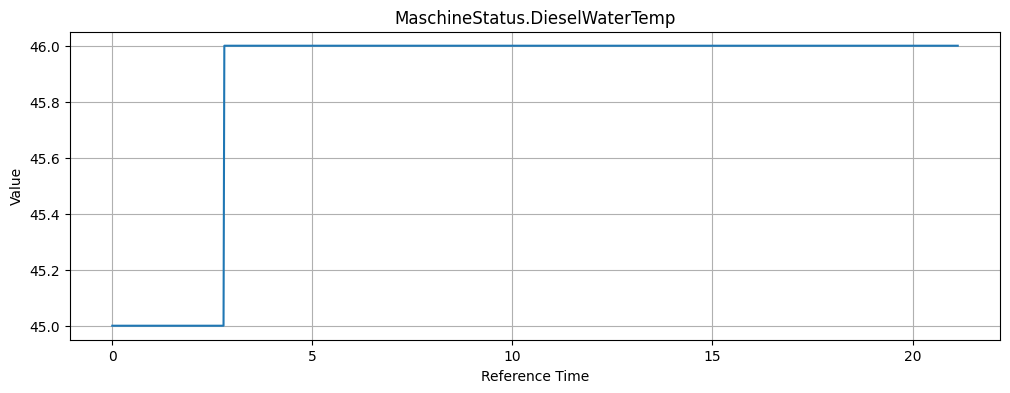

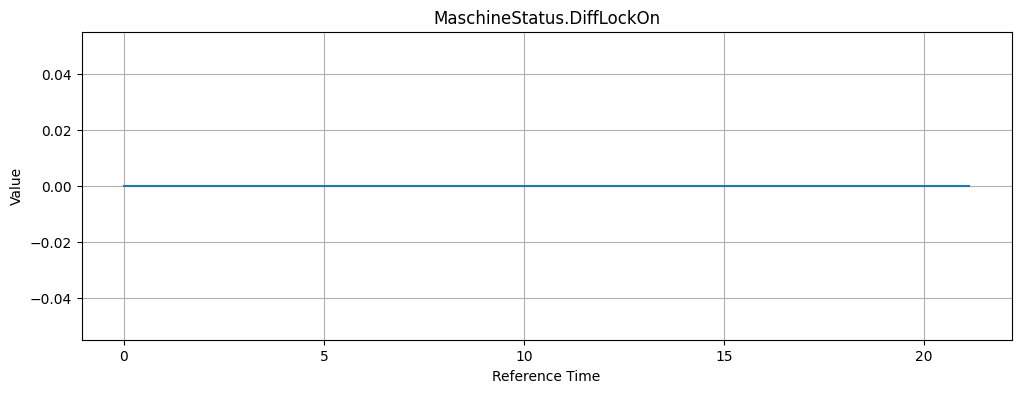

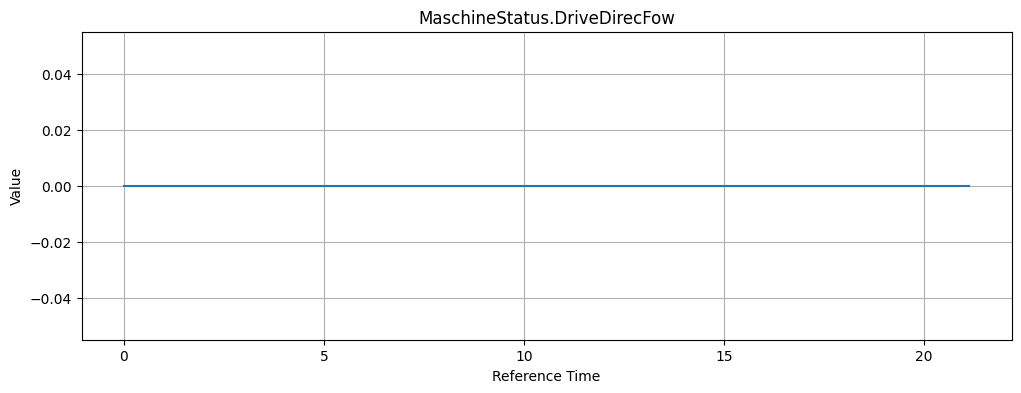

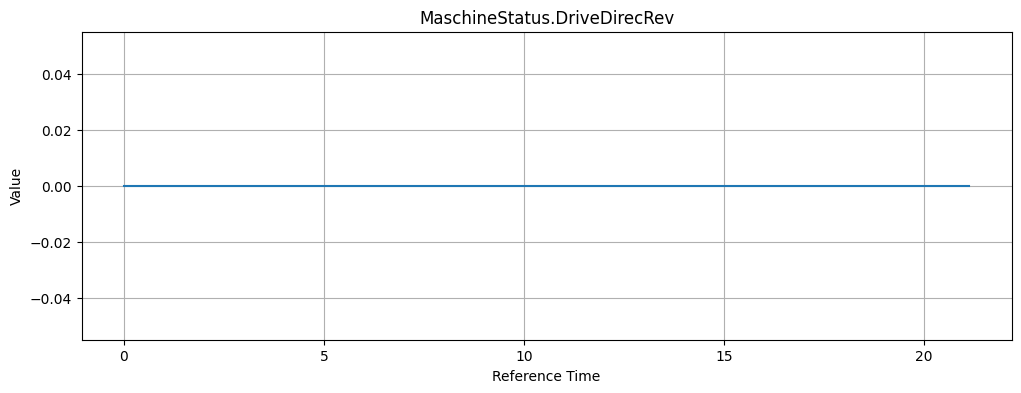

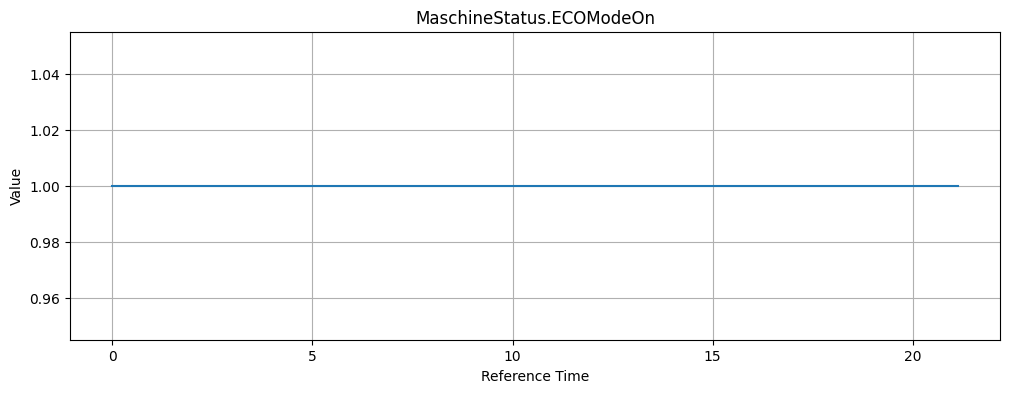

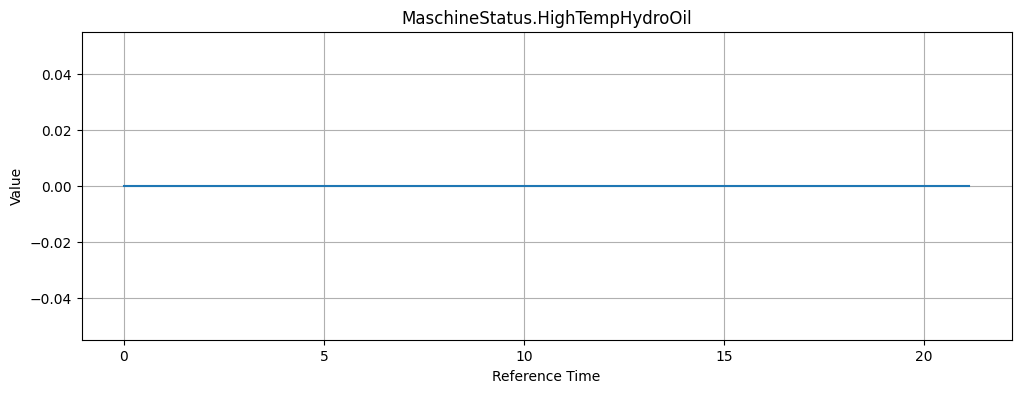

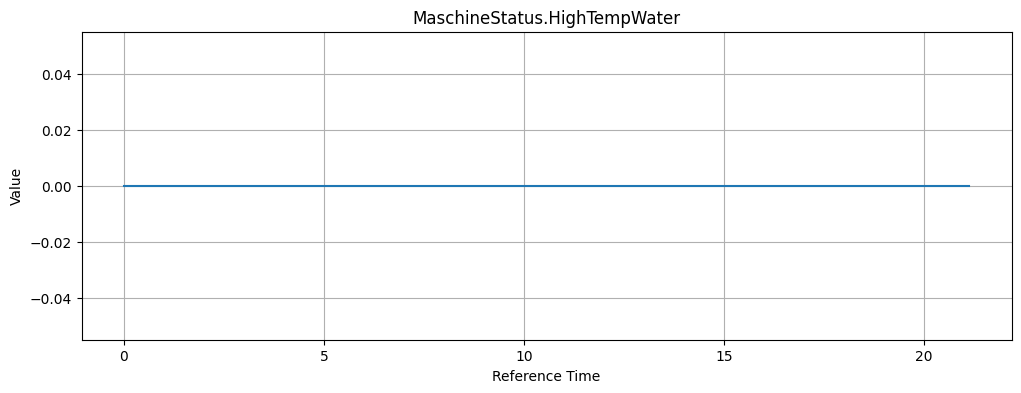

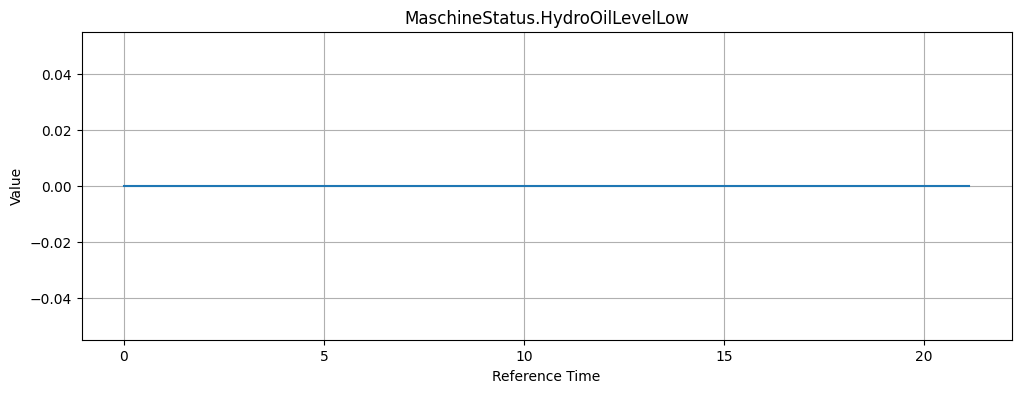

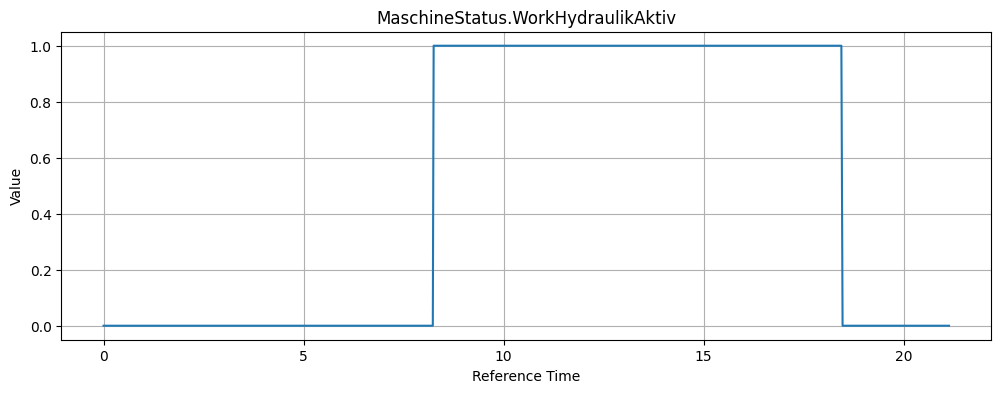

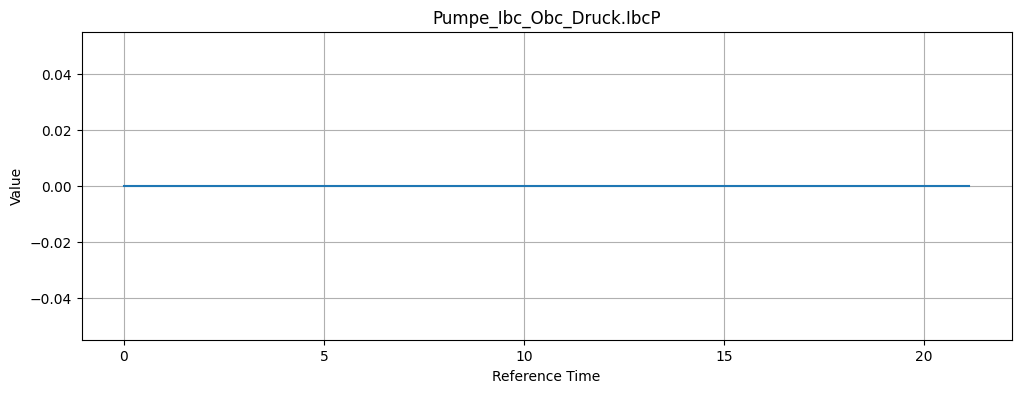

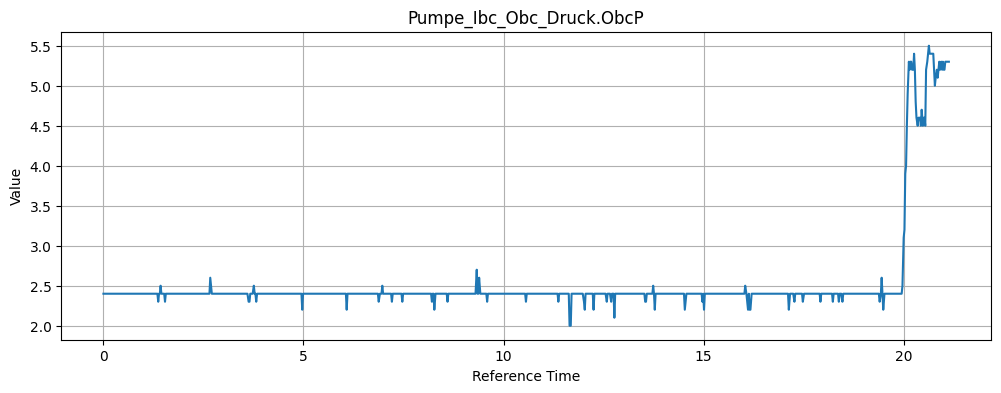

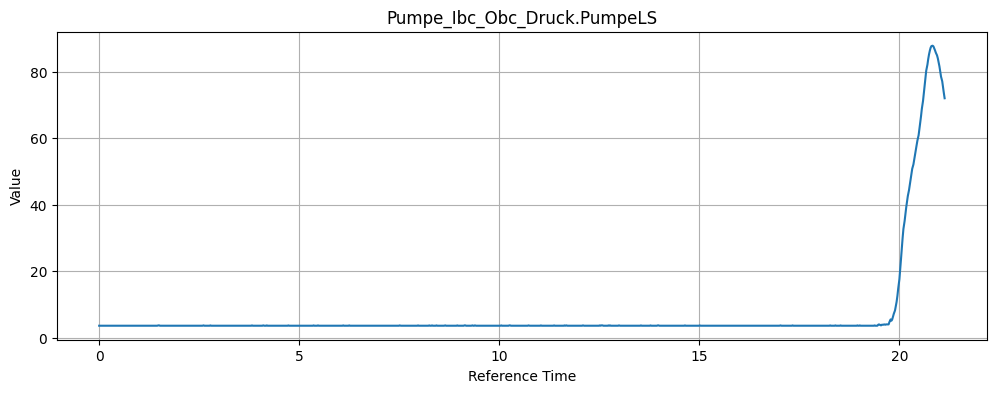

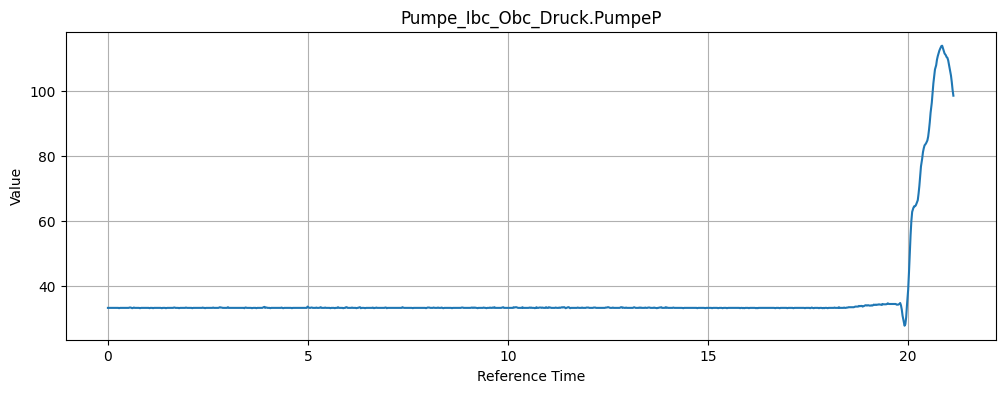

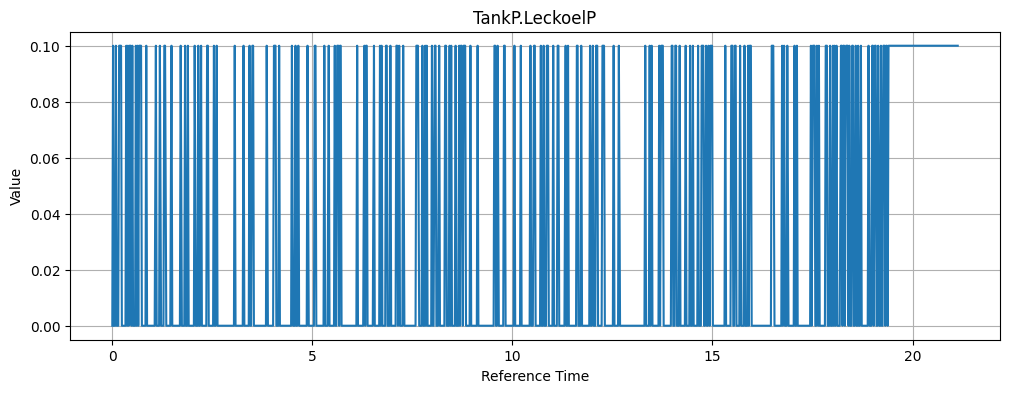

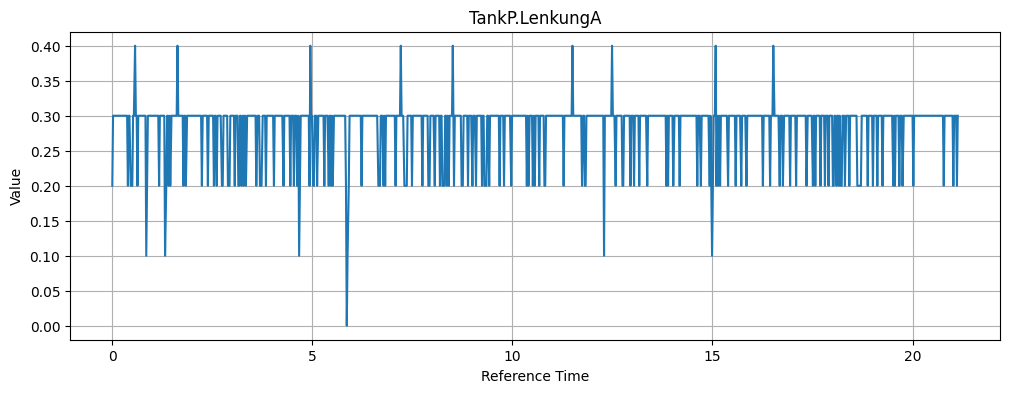

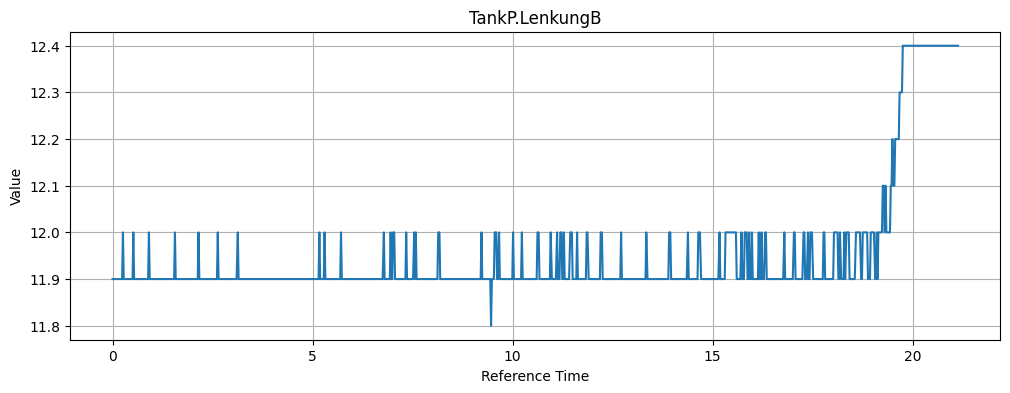

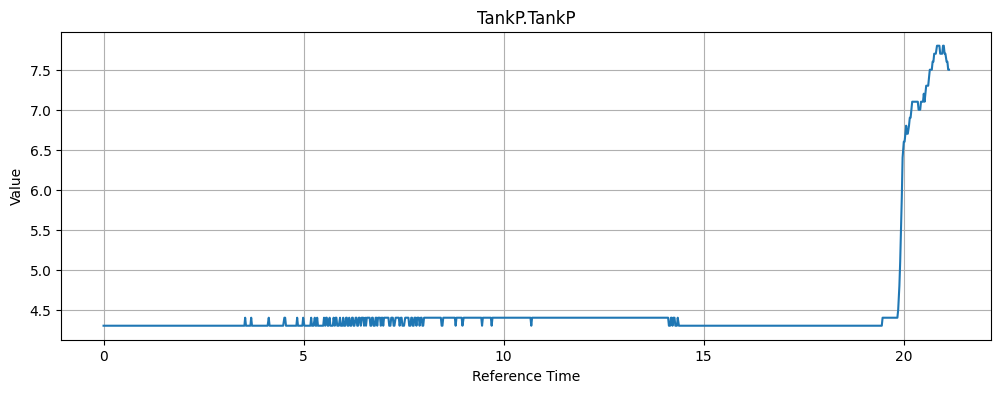

In [4]:
df.set_index('ReferenceTime', inplace=True)

for column in df.columns:
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[column])
    plt.title(column)
    plt.xlabel('Reference Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

In [5]:
import featuretools as ft
dataframes = {
    "main": (df, "ReferenceTime", "Time"),
}
feature_matrix_main, features_defs = ft.dfs(dataframes=dataframes, target_dataframe_name="main")

C:\Users\U\AppData\Roaming\Python\Python311\site-packages\featuretools\entityset\entityset.py:1910: UserWarning: index ReferenceTime not found in dataframe, creating new integer column
  warnings.warn(
C:\Users\U\AppData\Roaming\Python\Python311\site-packages\woodwork\type_sys\inference_functions.py:27: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pdtypes.is_categorical_dtype(series.dtype):
C:\Users\U\AppData\Roaming\Python\Python311\site-packages\woodwork\type_sys\inference_functions.py:189: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  pdtypes.is_categorical_dtype(series.dtype)
C:\Users\U\AppData\Roaming\Python\Python311\site-packages\woodwork\type_sys\inference_functions.py:189: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

In [6]:
# Data Summary: Overview of data types and missing values
data_info = df.info()

# Statistical Summary: Basic statistics for numerical columns
statistical_summary = df.describe()

data_info, statistical_summary

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, 0 to 968
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   ReferenceTime                      969 non-null    int64         
 1   Time                               969 non-null    datetime64[ns]
 2   DataTank.TemperaturTank            969 non-null    int64         
 3   DieselData.DieselRPM               969 non-null    int64         
 4   DieselData.Fuelconsumption         969 non-null    float64       
 5   DieselData.NAFGear                 969 non-null    int64         
 6   DieselData.OperatHours             969 non-null    int64         
 7   DieselData.Speed                   969 non-null    int64         
 8   MaschineStatus.AllradAus           969 non-null    int64         
 9   MaschineStatus.AmbientPressure     969 non-null    int64         
 10  MaschineStatus.AmbientTemp         969 non-

(None,
        ReferenceTime                           Time  DataTank.TemperaturTank  \
 count     969.000000                            969                    969.0   
 mean      484.000000  2022-05-04 12:17:01.268448768                     16.0   
 min         0.000000     2022-05-04 12:16:50.720000                     16.0   
 25%       242.000000  2022-05-04 12:16:55.968999936                     16.0   
 50%       484.000000     2022-05-04 12:17:01.260000                     16.0   
 75%       726.000000  2022-05-04 12:17:06.569999872                     16.0   
 max       968.000000     2022-05-04 12:17:11.850000                     16.0   
 std       279.870506                            NaN                      0.0   
 
        DieselData.DieselRPM  DieselData.Fuelconsumption  DieselData.NAFGear  \
 count            969.000000                  969.000000               969.0   
 mean             996.332301                    2.948091                 2.0   
 min              796.

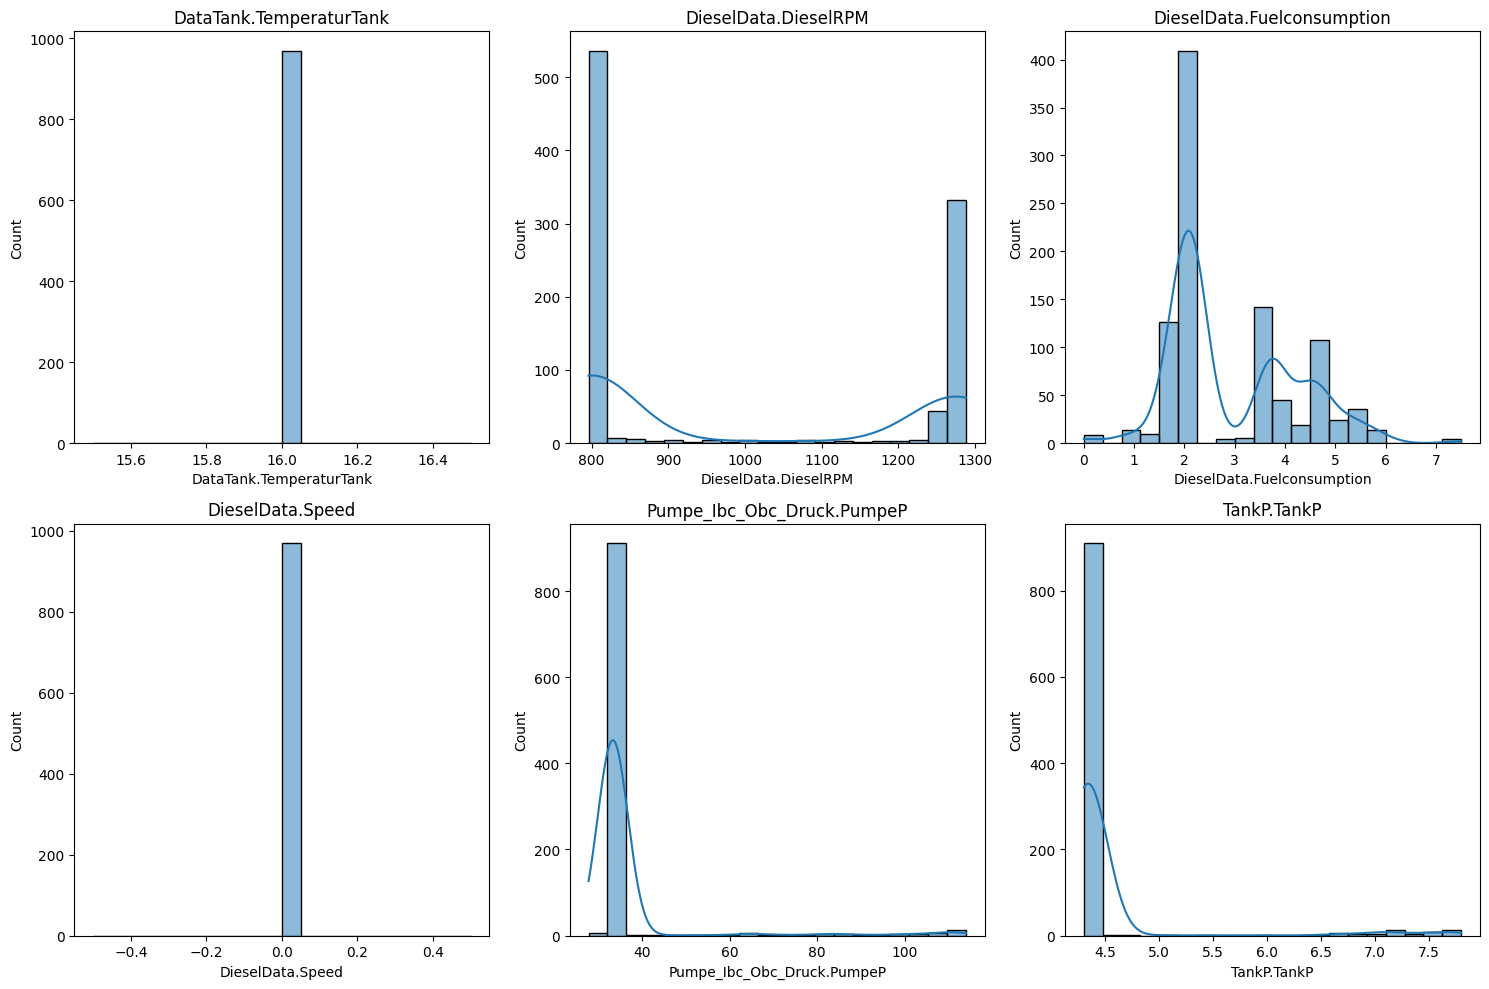

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a few columns for distribution analysis
columns_for_distribution = ['DataTank.TemperaturTank', 'DieselData.DieselRPM', 
                            'DieselData.Fuelconsumption', 'DieselData.Speed', 
                            'Pumpe_Ibc_Obc_Druck.PumpeP', 'TankP.TankP']

# Plotting histograms for selected columns
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_for_distribution, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()


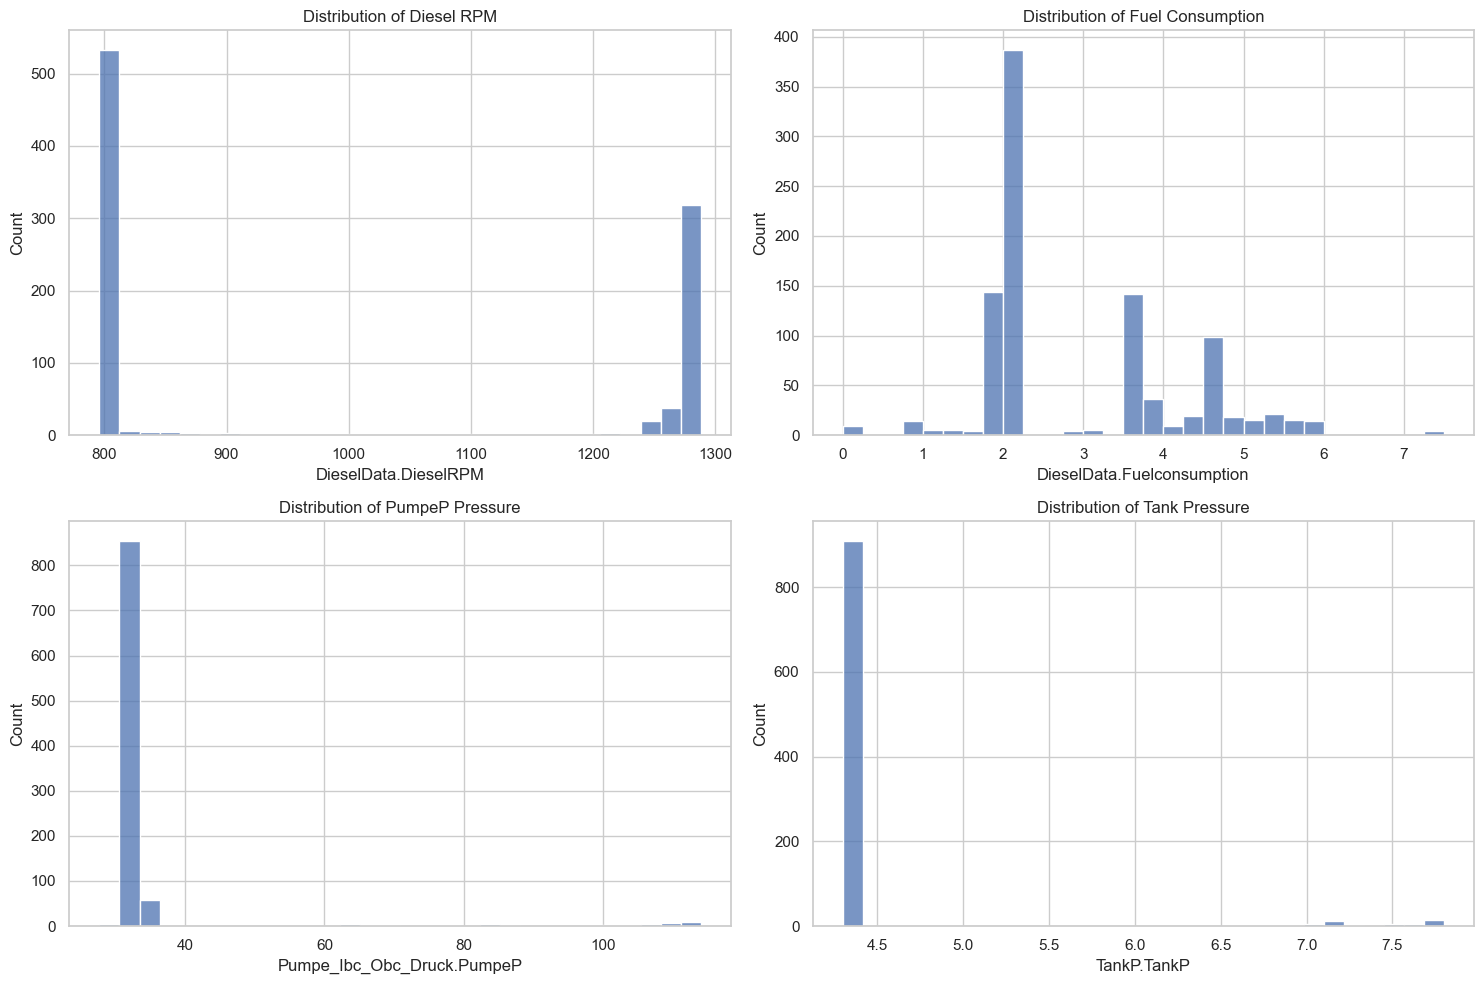

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style
sns.set(style="whitegrid")

# Plotting distributions of a few selected columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Diesel RPM
sns.histplot(df['DieselData.DieselRPM'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Diesel RPM')

# Fuel Consumption
sns.histplot(df['DieselData.Fuelconsumption'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Fuel Consumption')

# Pressure (PumpeP)
sns.histplot(df['Pumpe_Ibc_Obc_Druck.PumpeP'], bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of PumpeP Pressure')

# Tank Pressure (TankP)
sns.histplot(df['TankP.TankP'], bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Tank Pressure')

plt.tight_layout()
plt.show()


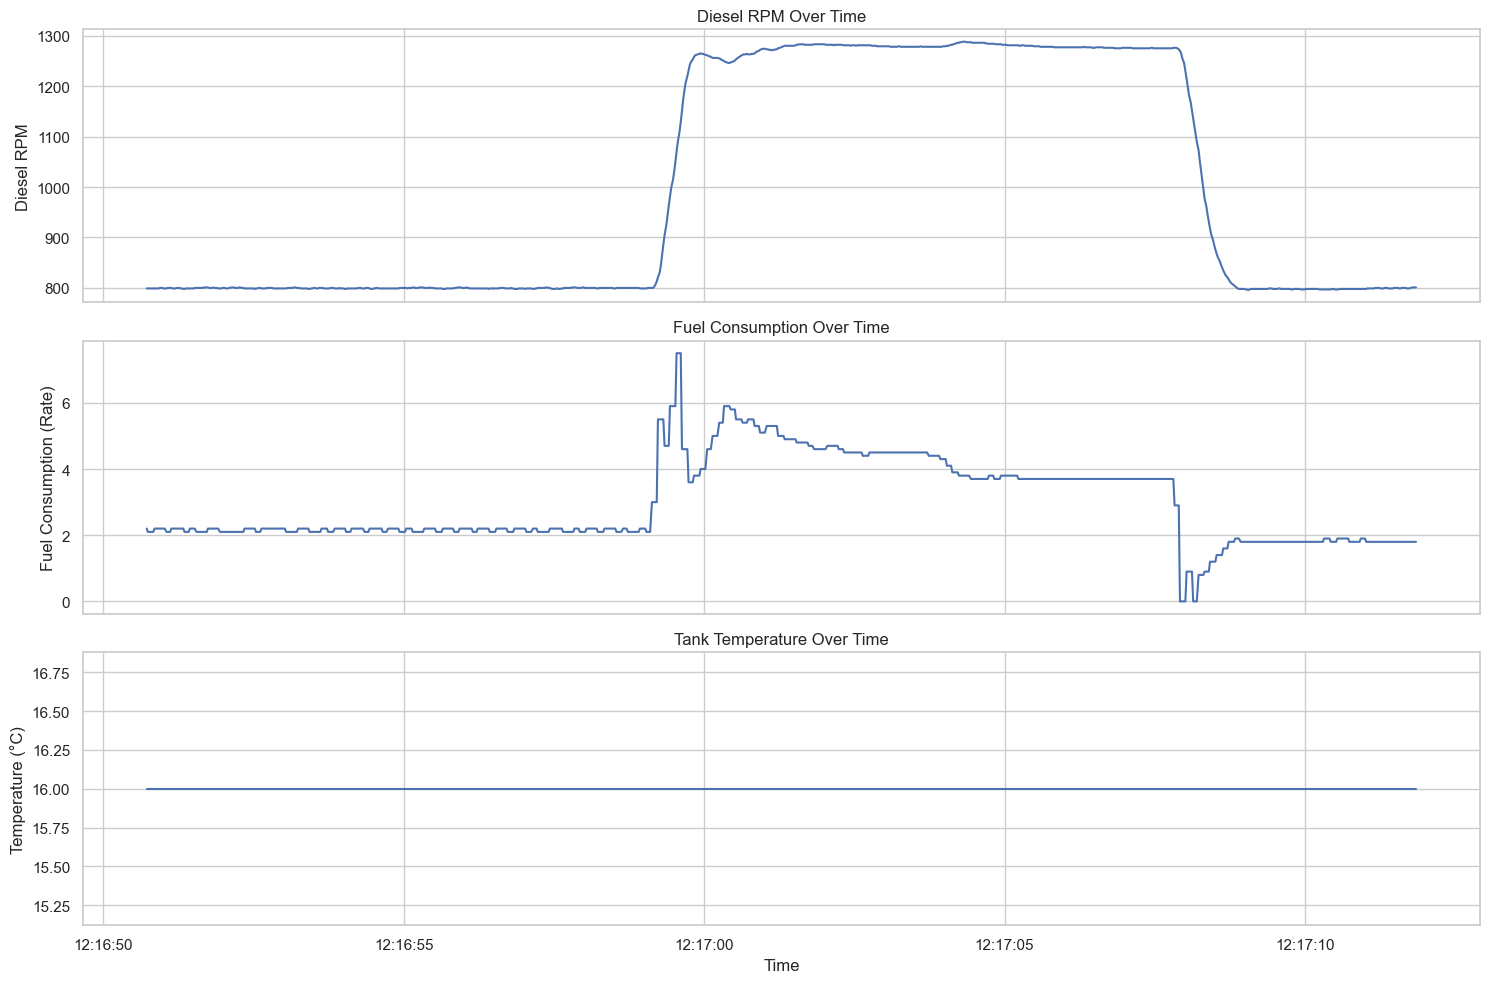

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting key time series data
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10), sharex=True)

# Diesel RPM over time
sns.lineplot(ax=axes[0], x=df['Time'], y=df['DieselData.DieselRPM'])
axes[0].set_title('Diesel RPM Over Time')
axes[0].set_ylabel('Diesel RPM')

# Fuel consumption over time
sns.lineplot(ax=axes[1], x=df['Time'], y=df['DieselData.Fuelconsumption'])
axes[1].set_title('Fuel Consumption Over Time')
axes[1].set_ylabel('Fuel Consumption (Rate)')

# Tank temperature over time
sns.lineplot(ax=axes[2], x=df['Time'], y=df['DataTank.TemperaturTank'])
axes[2].set_title('Tank Temperature Over Time')
axes[2].set_ylabel('Temperature (°C)')
axes[2].set_xlabel('Time')

# Adjusting layout for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Predictive Modeling: Building models to predict certain outcomes (like maintenance needs or performance metrics) based on this data.